In [10]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models  
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [11]:
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()

In [12]:
xtest.shape

(10000, 32, 32, 3)

In [13]:
xtrain.shape

(50000, 32, 32, 3)

In [14]:
ytrain.shape

(50000, 1)

In [15]:
ytest.shape

(10000, 1)

In [16]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
ytrain = ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
ytest = ytest.reshape(-1,)

In [19]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [20]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

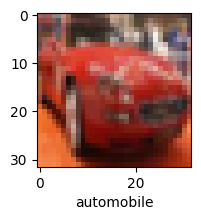

In [21]:
plot_sample(xtrain,ytrain, 5)

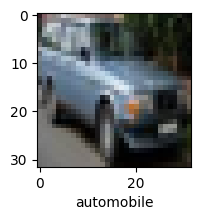

In [22]:
plot_sample(xtrain, ytrain, 201)

In [23]:
#normalize data 
xtrain = xtrain /255.0
xtest = xtest / 255.0

In [24]:
ann = models.Sequential([layers.Flatten(input_shape= (32,32,3)),
                        layers.Dense(3000, activation = 'relu'),
                        layers.Dense(1000, activation = 'relu'),
                        layers.Dense(10, activation = 'softmax')])

/Users/n18576/source/edoatley/ml/.venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(xtrain, ytrain, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3035 - loss: 1.9310
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4187 - loss: 1.6420
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4511 - loss: 1.5513
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4787 - loss: 1.4810
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4944 - loss: 1.4379


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

ypred = ann.predict(xtest)
ypred_classes = [np.argmax(element) for element in ypred]

print('classification report:\n', classification_report(ytest, ypred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
classification report:
               precision    recall  f1-score   support

           0       0.60      0.53      0.56      1000
           1       0.64      0.54      0.59      1000
           2       0.40      0.36      0.38      1000
           3       0.36      0.30      0.33      1000
           4       0.48      0.36      0.41      1000
           5       0.37      0.41      0.39      1000
           6       0.50      0.57      0.53      1000
           7       0.56      0.56      0.56      1000
           8       0.61      0.64      0.63      1000
           9       0.47      0.70      0.56      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



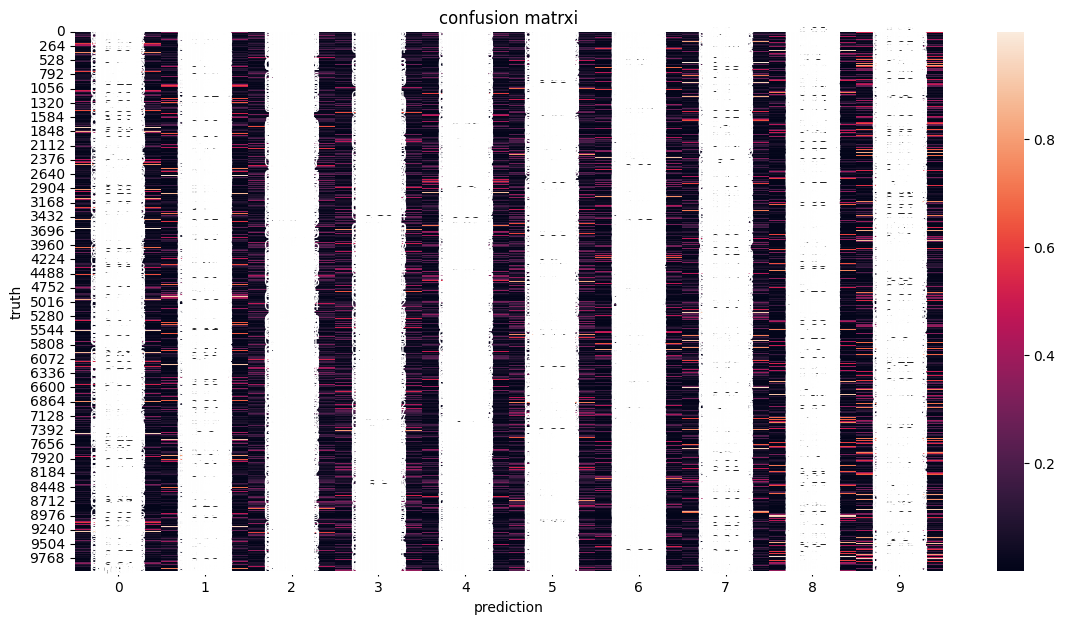

In [27]:
import seaborn as sns

plt.figure(figsize=(14,7))
sns.heatmap(ypred, annot = True)
plt.ylabel('truth')
plt.xlabel('prediction')
plt.title('confusion matrxi')
plt.show()

In [28]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
    
])

/Users/n18576/source/edoatley/ml/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
cnn.compile(optimizer = 'adam', 
            loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [30]:
cnn.fit(xtrain,ytrain, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3792 - loss: 1.7143
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6058 - loss: 1.1303
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6603 - loss: 0.9861
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6901 - loss: 0.8922
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7148 - loss: 0.8208
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7366 - loss: 0.7601
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7578 - loss: 0.7055
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7742 - loss: 0.6587
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7893 - loss: 0.6087
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8019 - loss: 0.5753


In [31]:
cnn.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6993 - loss: 0.9273


[0.9357225298881531, 0.6984000205993652]

In [32]:
ypred = cnn.predict(xtest)
ypred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.4938758e-03, 2.2273420e-04, 1.9232768e-03, 5.0371718e-01,
        4.0255080e-05, 4.8169908e-01, 1.7829242e-03, 1.6844572e-04,
        7.7926968e-03, 1.5953096e-04],
       [3.1387929e-03, 8.4418412e-03, 2.2013176e-06, 1.9926354e-06,
        5.2509890e-09, 1.2238058e-06, 7.1065261e-07, 1.5884408e-09,
        9.8825204e-01, 1.6116878e-04],
       [3.8801324e-02, 2.5470310e-01, 9.5744029e-04, 7.0826239e-03,
        6.6227739e-04, 1.6567037e-03, 6.9986470e-04, 3.4518511e-04,
        5.7784837e-01, 1.1724304e-01],
       [9.6580297e-01, 1.1651629e-04, 6.9867414e-03, 3.8212782e-03,
        1.2271033e-03, 3.4884186e-04, 5.9748974e-05, 4.0059123e-05,
        2.1430718e-02, 1.6615720e-04],
       [9.4214784e-06, 3.4607085e-05, 8.0059469e-02, 9.5749691e-02,
        1.7867321e-01, 1.0804701e-02, 6.3421255e-01, 1.2285651e-05,
        4.4026811e-04, 3.9155116e-06]], dtype=float32)

In [33]:
yclasses = [np.argmax(element) for element in ypred]
yclasses[:5]

[3, 8, 8, 0, 6]

In [34]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

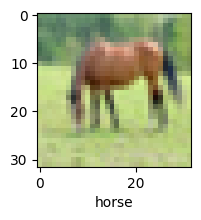

In [35]:
plot_sample(xtest, ytest, 60)

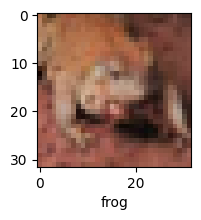

In [36]:
plot_sample(xtest, ytest, 5)

In [37]:
classes [yclasses[60]]

'horse'

horse


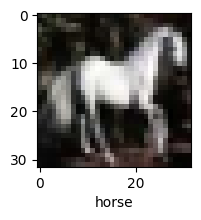

In [38]:
idx = 13
print(classes [yclasses[idx]])
plot_sample(xtest, ytest, idx)